In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
df = pd.read_csv('data/kc_house_data.csv')

df.drop_duplicates(inplace=True)
df.shape

(21597, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Business Understanding:
- Zillow is interested in improving the prediction accuracy of their in-house housing price-prediction model. 
- Additionally, Zillow is also interested in creating a new online advising application for potential buyers, which will support them in their house hunting. Potential buyers always find themselves in a conflict between their budget and their expectations for a future house. In this application, first, customers input their conditions for a future house (e.g., the number of bedrooms, areas of living). It will return with the expected price for this house. If the expected price is larger than the customer’s budget, this application will outline how much a customer can save by relaxing their conditions for a house. For example, it will tell them they can save XXXUSD by choosing an area outside of a city. With this application, Zillow can provide more diverse housing options and matches to better meet the customers’ budget constraints and expectations. 
- We contracted with Zillow to develop (1) a market housing price-prediction model and (2) a new application tool to support customers’ housing search by balancing between their budget and their expected housing features.

### 1. Dataset

- We use a dataset on market housing prices for King County, which includes Seattle. It includes the sold prices of houses between May 2014 and May 2015, as well as 20 various housing features, such as the square footage of a living space, the geographical locations of the house, and so on. 
- The total number of observations is 21597. 
- For this project, we limit our analysis to the following 12 variables due to tour time constraints.



In [4]:
# The data covers 2014 & 2015. 
pd.DatetimeIndex(df['date']).year.unique()

Int64Index([2014, 2015], dtype='int64', name='date')

In [5]:
# Drop the following variables (according to the project description). 
drop=['view', 'sqft_above', 'sqft_basement', 'yr_renovated',
      'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Reassigne dataframe
df.drop(labels=drop, axis=1, inplace=True)

In [6]:
# 12 variables, n=21597  
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   date         21597 non-null  object 
 2   price        21597 non-null  float64
 3   bedrooms     21597 non-null  int64  
 4   bathrooms    21597 non-null  float64
 5   sqft_living  21597 non-null  int64  
 6   sqft_lot     21597 non-null  int64  
 7   floors       21597 non-null  float64
 8   waterfront   19221 non-null  object 
 9   condition    21597 non-null  object 
 10  grade        21597 non-null  object 
 11  yr_built     21597 non-null  int64  
 12  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 2.3+ MB


### 2. Data Manipulation

In [7]:
# 5 points statistics 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.0,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,0.5,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,370.0,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.0,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.0,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
yr_built,21597.0,1.971000e+03,2.937523e+01,1900.0,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
zipcode,21597.0,9.807795e+04,5.351307e+01,98001.0,9.803300e+04,9.806500e+04,9.811800e+04,9.819900e+04


#### 2.1 Missing variables (waterfront)

In [8]:
# waterfront has 2376 missing variables 
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64

In [9]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [10]:
# convert nan => 'N/A'
df.waterfront = df.waterfront.fillna('N/A')

In [11]:
df.waterfront.unique()

array(['N/A', 'NO', 'YES'], dtype=object)

In [12]:
# zipcode of houses for missing waterfront variables  
waterfront_na = df.loc[df.waterfront=='N/A']
waterfront_na.zipcode.unique()

# from the zipcode, can not tell if 'N/A' = 'NO'

array([98178, 98007, 98030, 98074, 98105, 98166, 98004, 98056, 98058,
       98168, 98118, 98003, 98133, 98177, 98034, 98103, 98126, 98038,
       98040, 98053, 98023, 98052, 98042, 98059, 98117, 98146, 98014,
       98006, 98116, 98033, 98115, 98045, 98019, 98055, 98188, 98024,
       98125, 98198, 98031, 98109, 98002, 98065, 98144, 98199, 98092,
       98102, 98155, 98075, 98011, 98136, 98072, 98008, 98106, 98027,
       98029, 98005, 98070, 98028, 98022, 98108, 98010, 98001, 98112,
       98077, 98107, 98122, 98148, 98119, 98032, 98039])

In [13]:
#waterfront_na.view.value_counts()

#### 2.2 Housing price (y)

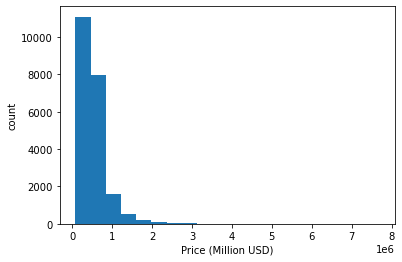

In [14]:
# Outliers skewe the distribution.  
plt.hist(x=df.price, bins=20)

plt.xlabel("Price (Million USD)")
plt.ylabel('count');


In [15]:
print(f'Threshold price for top 1%: {df.price.quantile(0.99)}')
print(f'Threshold price for top 2.5%: {df.price.quantile(0.975)}')
print(f'Threshold price for top 5%: {df.price.quantile(0.95)}')

Threshold price for top 1%: 1970000.0
Threshold price for top 2.5%: 1490000.0
Threshold price for top 5%: 1160000.0


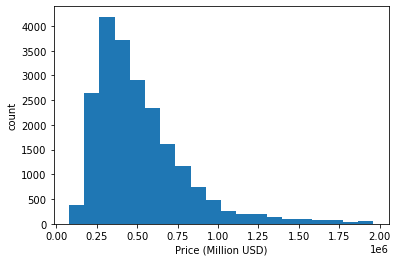

In [16]:
# If we drop top 1% (price >= 1970000), distribution looks less skewed 
x=df.loc[df.price < df.price.quantile(0.99)].price
plt.hist(x=x, bins=20)

plt.xlabel("Price (Million USD)")
plt.ylabel('count');

In [17]:
# Log transformation 
df['price_log']=np.log(df.price)

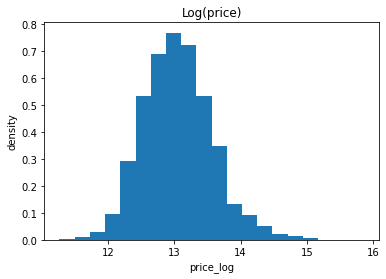

In [18]:
# Distribution of log(price) 

plt.hist(x=df.price_log, bins=20, density=True)
plt.title('Log(price)')
plt.xlabel('price_log')
plt.ylabel('density');

#### 2.3 Dependent Variables (X)

##### Number of Bedrooms

In [19]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [20]:
# Drop outlier (the house with 33 bedrooms)
df = df.loc[df.bedrooms!=33]

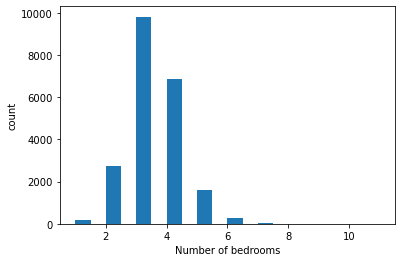

In [21]:
plt.hist(x=df.bedrooms, bins=20)

plt.xlabel('Number of bedrooms')
plt.ylabel('count');

##### Number of Bathrooms

In [22]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

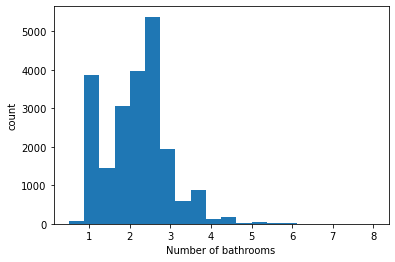

In [23]:
plt.hist(x=df.bathrooms, bins=20)

plt.xlabel('Number of bathrooms')
plt.ylabel('count');

##### Sqft_living

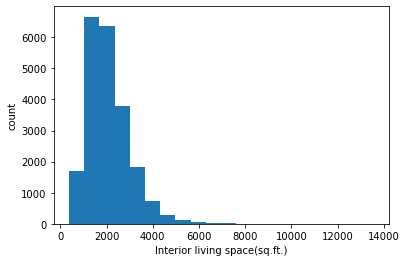

In [24]:
plt.hist(x=df.sqft_living, bins=20)

plt.xlabel('Interior living space(sq.ft.)')
plt.ylabel('count');

In [25]:
print(f'Threshold sqft_living for top 1%: {df.sqft_living.quantile(0.99)}')
print(f'Threshold sqft_living for top 2.5%: {df.sqft_living.quantile(0.975)}')
print(f'Threshold sqft_living for top 5%: {df.sqft_living.quantile(0.95)}')

Threshold sqft_living for top 1%: 4980.0
Threshold sqft_living for top 2.5%: 4270.0
Threshold sqft_living for top 5%: 3760.0


In [26]:
# number of houses which has sqft_living is above 99% threshold 
print(f'Number of houses which sqft_living > 99% threshold: {len(df.loc[df.sqft_living>df.sqft_living.quantile(0.99)])}')

# Average housing price for over 99% threshold sqft 
print (f'Average housing price for over 99% threshold sqft houses: {df.loc[df.sqft_living > df.sqft_living.quantile(0.99)].price.mean()}')


Number of houses which sqft_living > 99% threshold: 215
Average housing price for over 99% threshold sqft houses: 2061799.534883721


##### sqft_lot

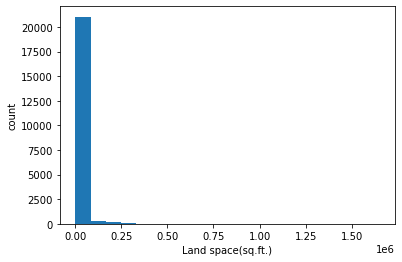

In [27]:
plt.hist(x=df.sqft_lot, bins=20)

plt.xlabel('Land space(sq.ft.)')
plt.ylabel('count');

##### floors

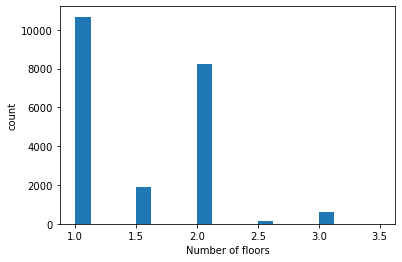

In [28]:
plt.hist(x=df.floors, bins=20)

plt.xlabel('Number of floors')
plt.ylabel('count');


##### House vintage = year of house was sold - year of house was built  

In [29]:
# vintage = year of house was sold - year of house was built  

# year of house was sold 
df['yr_sold']=pd.DatetimeIndex(df['date']).year

# year of house was sold - year of house was built
df['vintage'] = df['yr_sold'] - df['yr_built']



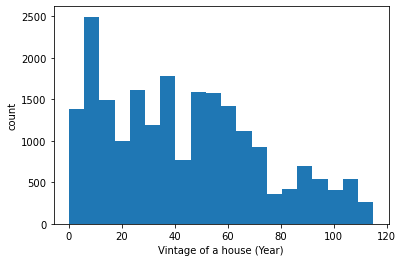

In [30]:
# There are 12 houses which vintage was negative (-1). 
# Since some people purchase houses before it is built, we change negative vintage to 0.  

df.vintage.replace({-1:0}, inplace=True)

plt.hist(x=df.vintage, bins=20)

plt.xlabel('Vintage of a house (Year)')
plt.ylabel('count');

#### categorical variables 

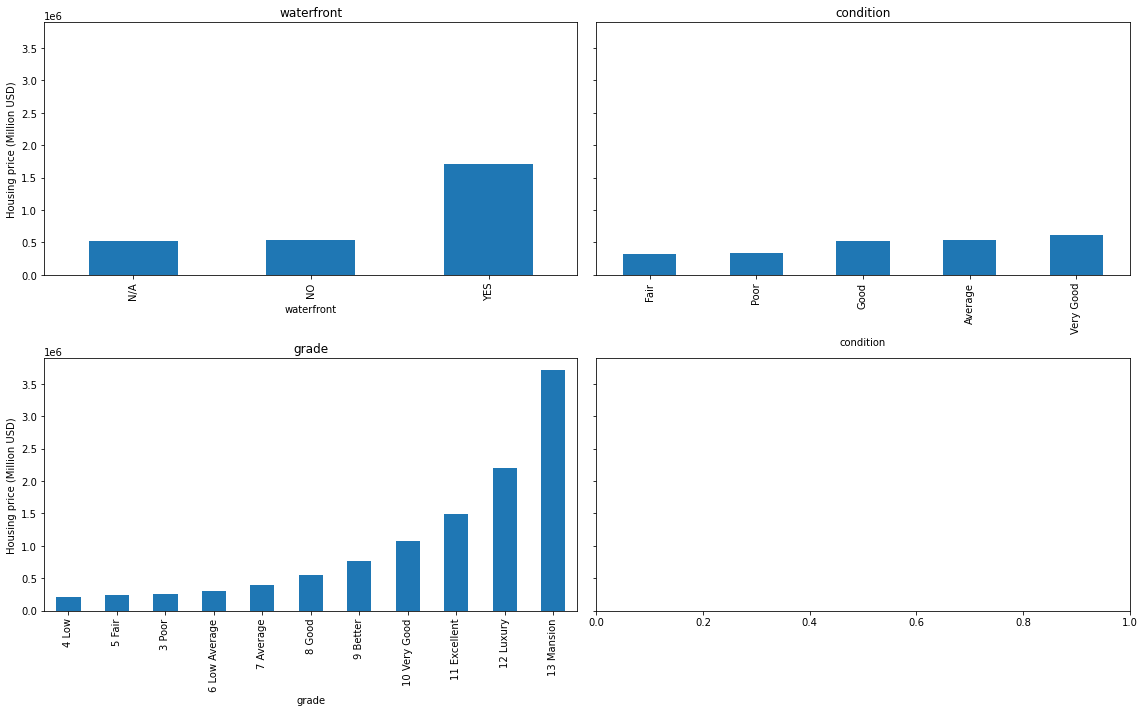

In [31]:
# Bar plots of average housing price by categories. 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16 , 10), sharey=True)

#select datatype=object
cate = df.select_dtypes('object').columns.drop(['date'])
for xcol, ax in zip(cate, axes.flatten()):
    df.groupby(xcol).mean()['price'].sort_values().plot.bar(ax=ax)
    
    ax.set_title(xcol)
    ax.set_ylabel('Housing price (Million USD)')
    
    
fig.tight_layout()

##### condition (categorical value)
- the condition of a house

In [32]:
df.condition.value_counts()

Average      14020
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

In [33]:
# cond_good = 1 if condition = very good or good. 
df['cond_good'] = (df['condition'] =='Very Good') | ((df.condition =='Good')).astype(int)
df['cond_good']=df['cond_good'].astype(int)

# cond_ave = 1 if condition =average
df['cond_ave'] = (df['condition'] =='Average')
df['cond_ave']=df['cond_ave'].astype(int)

##### grade (categorical value)
- An index from 1 to 13 for a quality of construction and design.

In [34]:
df.grade.value_counts()

7 Average        8973
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [35]:
# convert to numeric value (3(Poor)-13(Mansion))
df['grade'] = df['grade'].str.split().str[0]
df['grade']=df['grade'].astype(int)
df.grade.value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [36]:
## grade_above_average dummy (if grade = [8(Good) - 13(Mansion)], grade_above_average =1)
df['grade_above_ave'] = (df['grade'] > 7).astype(int)
df.grade_above_ave.value_counts()

0    11281
1    10315
Name: grade_above_ave, dtype: int64

##### Waterfront dummy (Yes=1)

In [37]:
df.waterfront.replace({'N/A' : 'N/A_NO' }, inplace = True)

wd = pd.get_dummies(df.waterfront, prefix='waterfront_' , drop_first=False)

wd = wd.waterfront__YES

df = pd.concat([df, wd], axis=1)

df.drop(labels='waterfront', axis=1, inplace =True)

##### Seattle dummy (Seattle = 1)

In [38]:
# Create seattle dummy 
# In a city, sqft is smaller, price is higher. So, relationship between price and other house features will be different between houses in Seattle and houses outside of the city.

# 28 zipcodes for Seattle 
seattle_zipcode=[98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, 98154, 98164, 98174, 98177]

df['seattle'] = [1 if x in seattle_zipcode else 0 for x in df.zipcode]
df.seattle.sum()
# 6297 houses are in seattle 

6951

### 2. Plotting price (y) and features (X) 

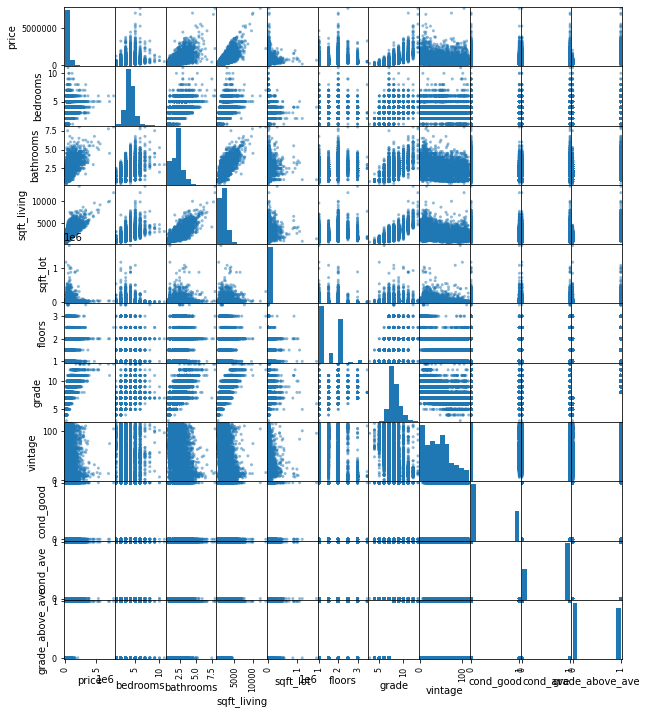

In [39]:
## scatter plot for continuous variables 

cont = df.select_dtypes(('int64', 'float64')).columns.drop(['id', 'yr_built', 'zipcode','seattle', 'yr_sold', 'price_log'])

pd.plotting.scatter_matrix(df[cont], figsize=(10,12));


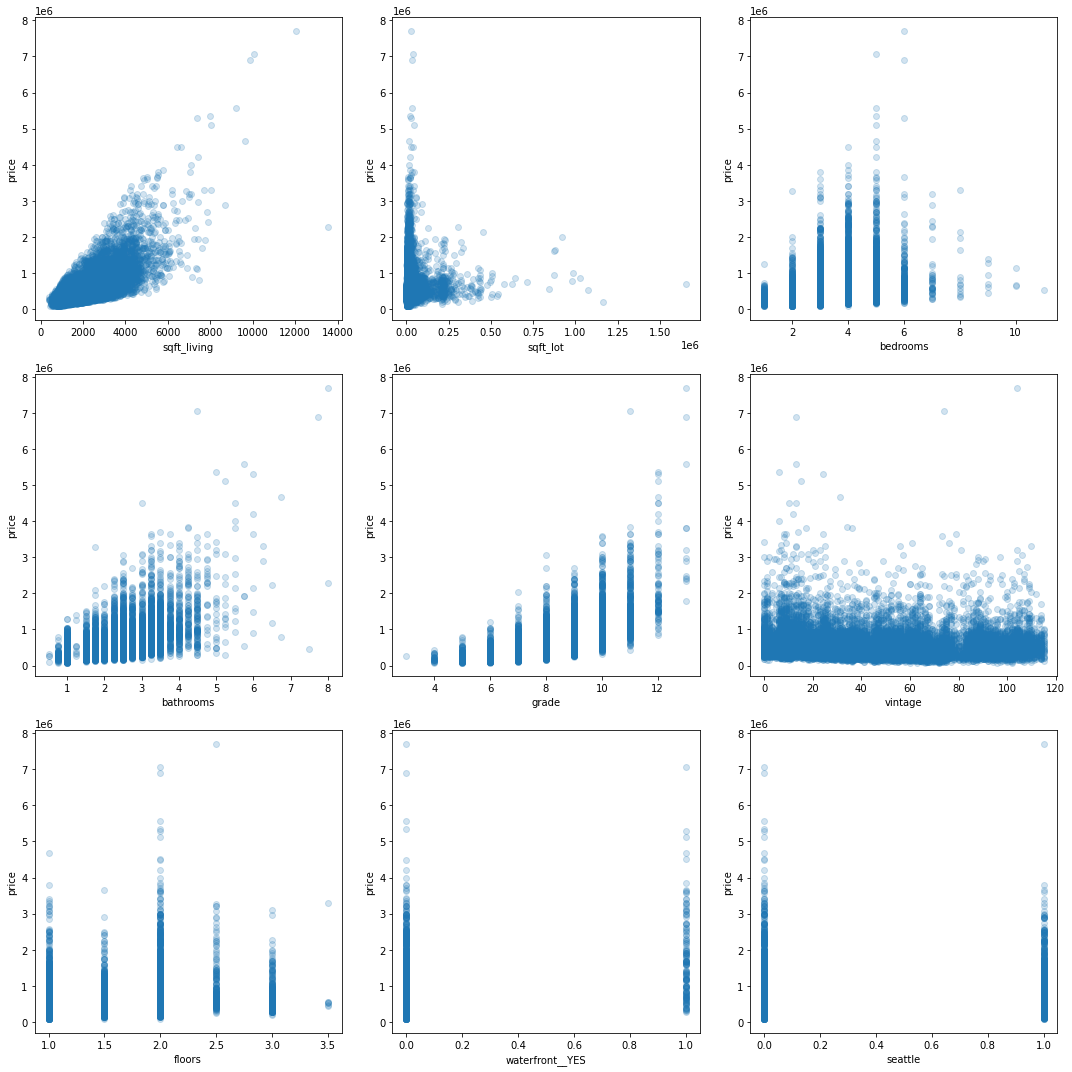

In [40]:
# Plotting X on y 

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
fig.set_tight_layout(True)

xcont = ['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'grade', 'vintage', 'floors', 'waterfront__YES', 'seattle']

for xcol, ax in zip(xcont, axes.flatten()):
    ax.scatter(df[xcol], df['price'], alpha=0.2)
    ax.set_xlabel(xcol)
    ax.set_ylabel("price")

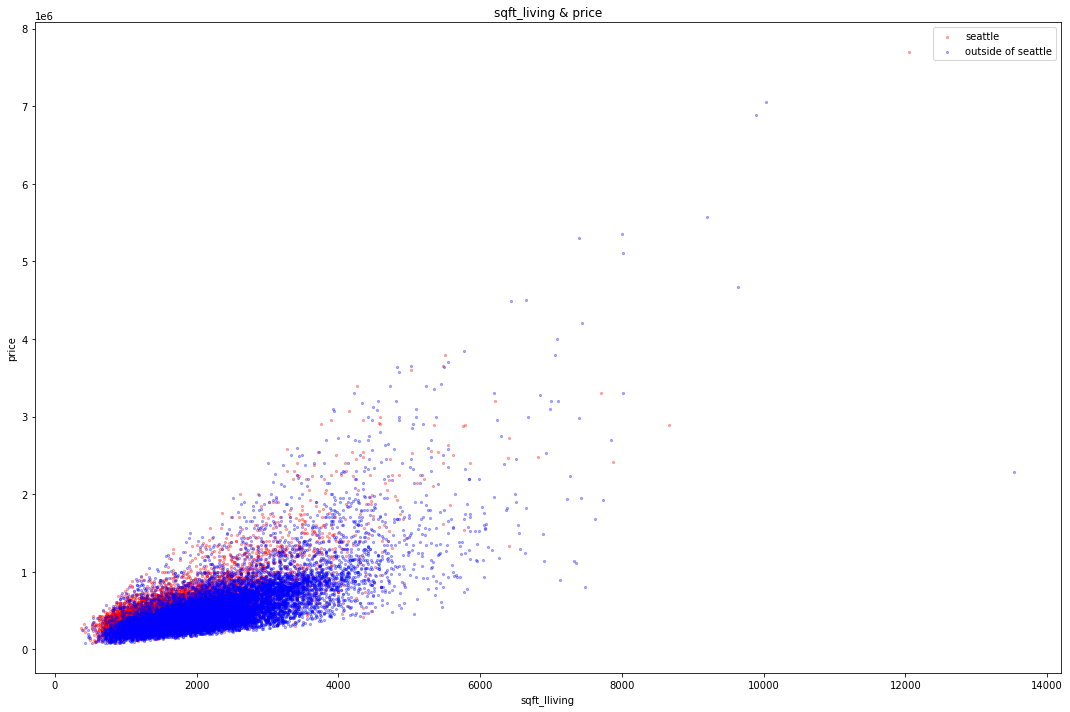

In [41]:
# Plot sqft_living and price 

plt.figure(figsize=(15, 10))
plt.scatter(x = df.loc[df.seattle==1].sqft_living , 
            y = df.loc[df.seattle==1].price , 
            c='r', s=5,
            alpha=0.3)
plt.scatter(x = df.loc[df.seattle==0].sqft_living , 
            y = df.loc[df.seattle==0].price , 
            c='b', s=5,
            alpha=0.3)


plt.xlabel("sqft_lliving")
plt.ylabel("price")
plt.title("sqft_living & price")
plt.legend(["seattle", "outside of seattle"])
plt.tight_layout()

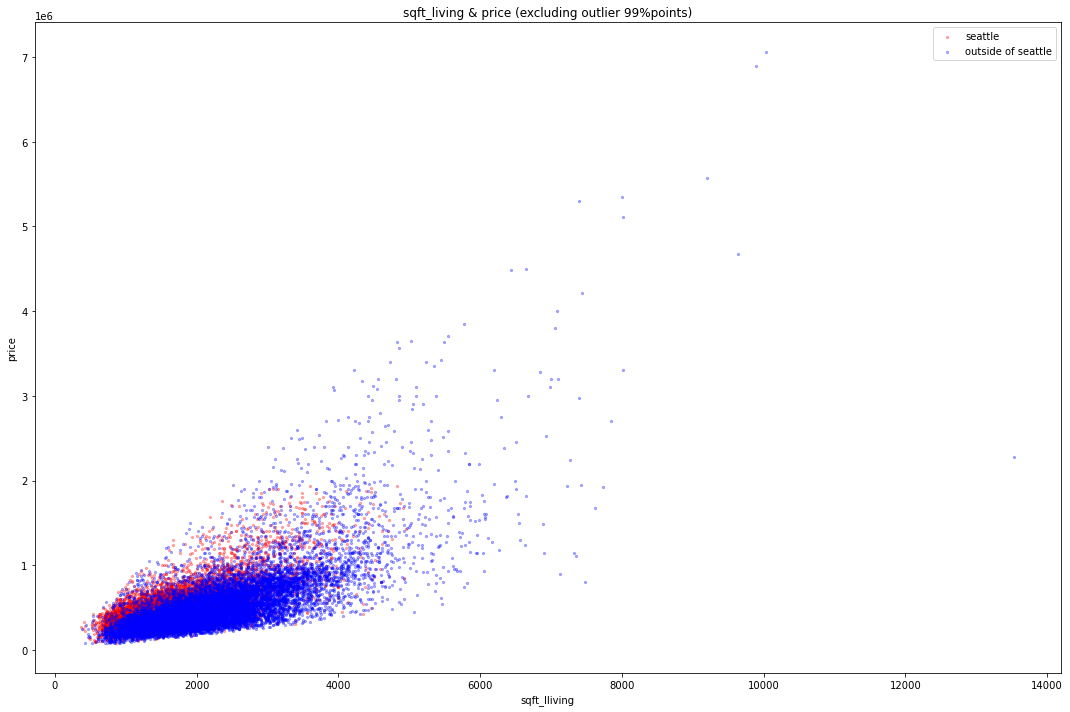

In [42]:
# Plot sqft_living and price, trimmed outlier (99%points)

sqrt99 = df.sqft_living.quantile(0.99)
price99 = df.price.quantile(0.99)

plt.figure(figsize=(15, 10))
plt.scatter(x = df.loc[(df.seattle==1) & (df.sqft_living < sqrt99)& (df.price < price99) ].sqft_living , 
            y = df.loc[(df.seattle==1) & (df.sqft_living < sqrt99)& (df.price < price99)].price , 
            c='r', s=5,
            alpha=0.3)
plt.scatter(x = df.loc[df.seattle==0 & (df.sqft_living < sqrt99) & (df.price < price99)].sqft_living , 
            y = df.loc[df.seattle==0 & ((df.sqft_living < sqrt99) & df.price < price99)].price , 
            c='b', s=5,
            alpha=0.3)


plt.xlabel("sqft_lliving")
plt.ylabel("price")
plt.title("sqft_living & price (excluding outlier 99%points)")
plt.legend(["seattle", "outside of seattle"])
plt.tight_layout()

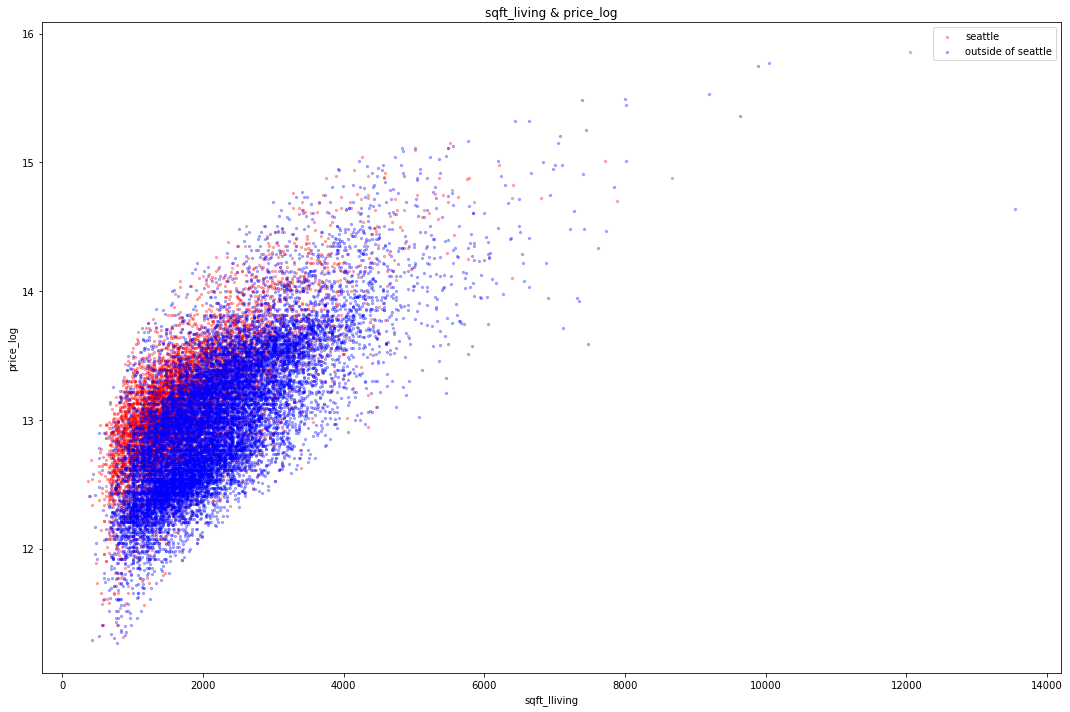

In [43]:
# Plot Log(sqft_living) and Log(price) 

plt.figure(figsize=(15, 10))
plt.scatter(x = df.loc[df.seattle==1].sqft_living , 
            y = df.loc[df.seattle==1].price_log , 
            c='r', s=5,
            alpha=0.3)
plt.scatter(x = df.loc[df.seattle==0].sqft_living , 
            y = df.loc[df.seattle==0].price_log , 
            c='b', s=5,
            alpha=0.3)


plt.xlabel("sqft_lliving")
plt.ylabel("price_log")
plt.title("sqft_living & price_log")
plt.legend(["seattle", "outside of seattle"])
plt.tight_layout()

#### 3. Correlation matrix

In [44]:
# drop id, date, condition, zipcode
df.drop(labels=['id', 'date', 'condition', 'zipcode'], axis=1, inplace=True)

<AxesSubplot:>

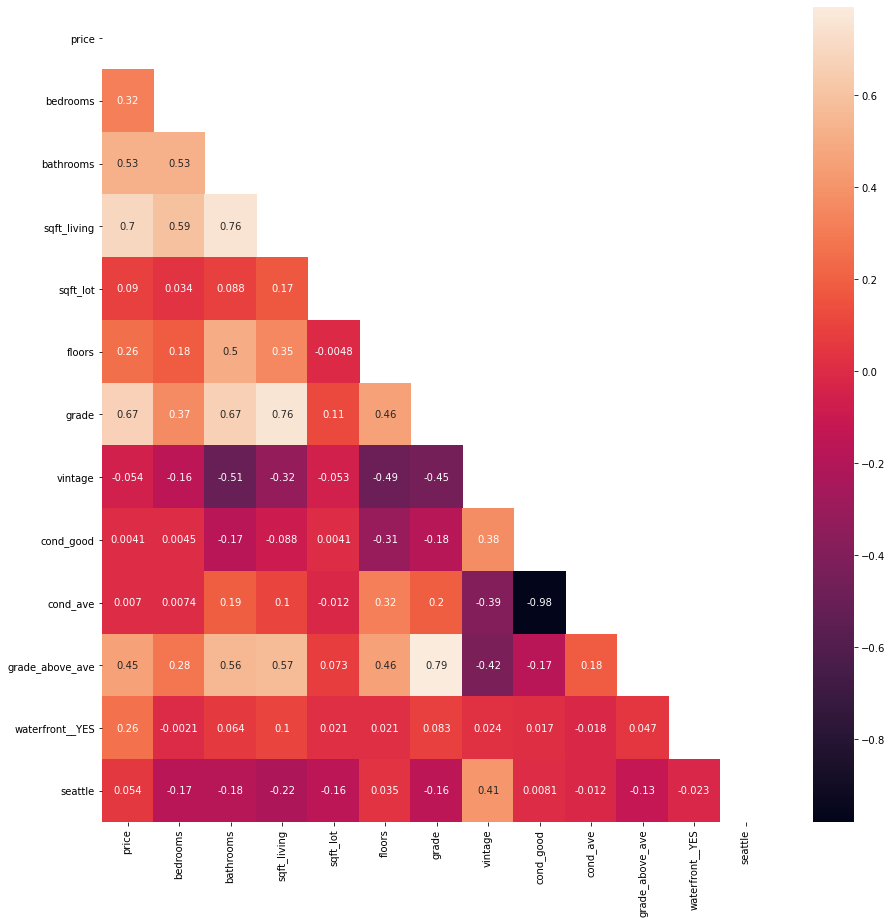

In [45]:
# Correlation Matrix 
corr = df.drop(labels=(['price_log', 'yr_sold', 'yr_built']), axis=1).corr()

# heatmap 
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(data=corr,
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax,
            annot = True,
            )

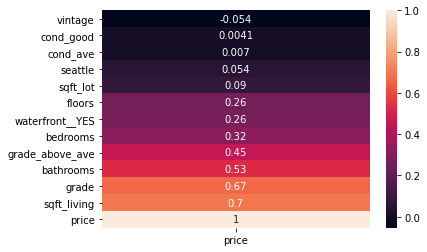

In [46]:
# Correlation between y and X
x = corr[['price']]
x = x.sort_values(by='price')
sns.heatmap(x, annot=True) ;

**Comments:** Sqft_living has the higest correlation, and then, grade of housing, number of bathrooms, number of bedrooms, waterfront dummy, follows.
According to the correlation matrix, Sqft_living has very high multicollinearity with the number of bathrooms and grade of housing. 
So for the model, we consider to inlcude Sqft_living, number of bedrooms, waterfront dummy, number of floors, sqft_lot, seattle dummy, house vintage. 
Instead of grade of a hoo=use which report high multicollinearity, we created dummy of grade_above_average (which equals 1 when the grade is above average). 


### 3. Model

[
model1.rsquared_adj, 
model2.rsquared_adj,
model3.rsquared_adj,
model4.rsquared_adj,
model5.rsquared_adj,
model6.rsquared_adj,
model7.rsquared_adj,
model8.rsquared_adj
]

##### Model 1 (Initial Model)

- It includes the most related feature to the house price (squared footage of a house’s living space, sqft_living) and waterfront dummy, which is another feature strongly related with the housing price but apparently independent of sqft_living. This model does include all datasets. 
- The coefficients of the model show that an increase in the house’s living space by one square foot increases the housing price by 273 USD. A waterfront location pushes the housing price by 865100 USD. 
- R2 scores = 0.529. This model explains 52% of the housing price movement. 
- Additional checks show that this model deviates from the linearity assumption, especially in the higher end houses, by over two million areas. The model also failed the normality and homoskedasticity assumptions. As the housing price goes up, the model deviates from the normality assumption, and the residuals of the model vary more. This may be partially explained by extreme outliers in the housing price data. So, for the next model, we exclude the outliers, whose price is in the top 1% of the dataset. 


In [48]:
# Initial model  
# Model 1 OLS price - sqft_living + waterfront) n=21596

formula1 = "price ~ sqft_living + C(waterfront__YES)"
model1 = smf.ols(formula1, df).fit()
model1.summary()
#plt.savefig('ols_price_sqft_living_waterfront')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                 1.215e+04
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:09:40   Log-Likelihood:            -2.9924e+05
No. Observations:               21596   AIC:                         5.985e+05
Df Residuals:                   21593   BIC:                         5.985e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -3.305e+04   4255.467     -7.767      0.000   -4.14e+04   -2.47e+04
C(waterfront__YES)[T.1]  8.651e+05    2.1e+04     41.115      0.000    8.24e+05    9.06e+05
sqft_living               272.7892      1.878    145.251      0.000     269.108     276.470
==============================================================================
Omnibus:                    13414.454   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434850.442
Skew:                           2.469   Prob(JB):                         0.00
Kurtosis:                      24.421   Cond. No.                     2.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

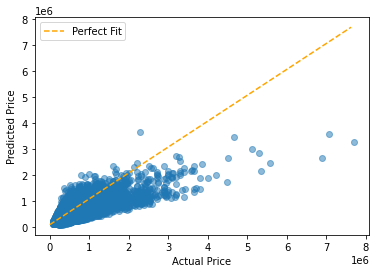

In [49]:
# Linearility check 
x_cols = ['sqft_living', 'waterfront__YES']
preds = model1.predict(df[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df.price.min(), df.price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-50-6b65adf53dc1>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


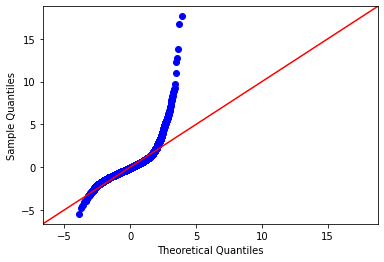

In [50]:
# QQ normality check here
import scipy.stats as stats

residuals = model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()


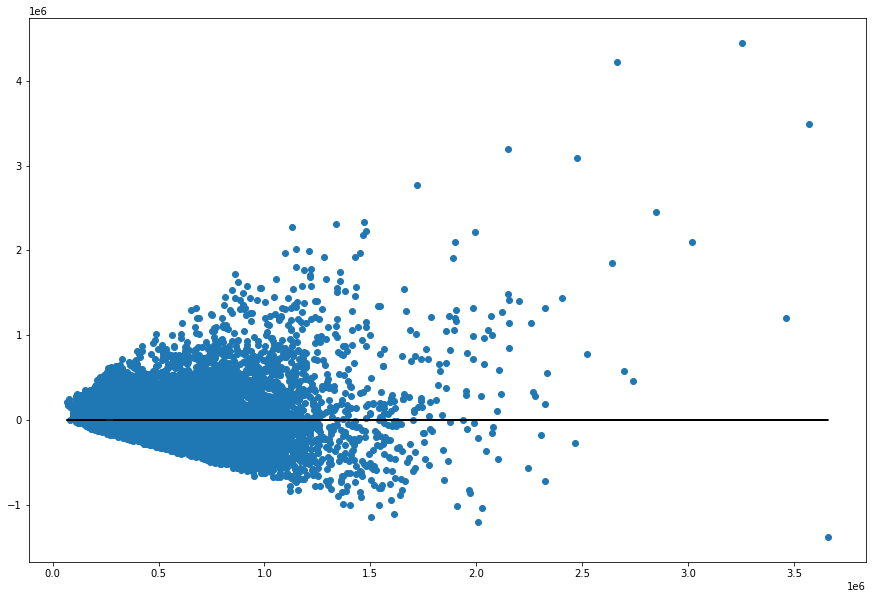

In [51]:
# Homoskedasticity 
plt.figure(figsize = (15, 10))
x_cols = ['sqft_living', 'waterfront__YES']
plt.scatter(model1.predict(df[x_cols]), model1.resid)
plt.plot(model1.predict(df[x_cols]), [0 for i in range(len(df))], c='black')

##### Model 2 (Excluding outliers)
- It dropped the cost of houses whose prices were above 1.97 million USD (a cutoff point for the top 1% price). As a result, we dropped 220 samples. 
- The model’s goodness of fit gradually dropped as the Adj R2 scores dropped by 0.05. However, the model deviates less from the linearity, normality, and homoskedasticity assumptions. It is still not perfectly linear or normal, but by dropping the extreme outliers, the estimation results from model 2 are more valid than model 1. 


In [53]:
# Model 2 (price - sqft_living + waterfront) (exlucing outliers, using 99% threshold) 

# df99 dropped samples which price are within the top 1% of the original data.   
# 347 samples are dropped. 
df_99 = df.loc[(df.price < df.price.quantile(0.99))]

#df_99 = df.loc[(df.sqft_living < df.sqft_living.quantile(0.99)) 
           #  & (df.price < df.price.quantile(0.99))]


formula2 = "price ~ sqft_living + C(waterfront__YES)"
model2 = smf.ols(formula2, df_99).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     9666.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:09:45   Log-Likelihood:            -2.9196e+05
No. Observations:               21379   AIC:                         5.839e+05
Df Residuals:                   21376   BIC:                         5.839e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5.827e+04   3646.314     15.980      0.000    5.11e+04    6.54e+04
C(waterfront__YES)[T.1]  4.981e+05   2.06e+04     24.185      0.000    4.58e+05    5.38e+05
sqft_living               223.1547      1.640    136.057      0.000     219.940     226.370
==============================================================================
Omnibus:                     4661.341   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13728.474
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       6.200   Cond. No.                     3.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

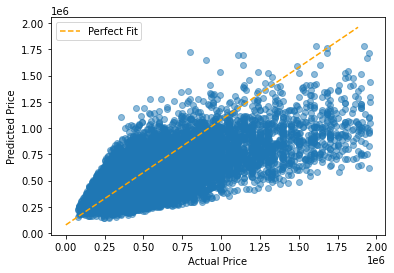

In [54]:
# Linearility check 
x_cols = ['sqft_living', 'waterfront__YES']
preds = model2.predict(df_99[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df_99.price.min(), df_99.price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df_99.price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-55-9062259cc084>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


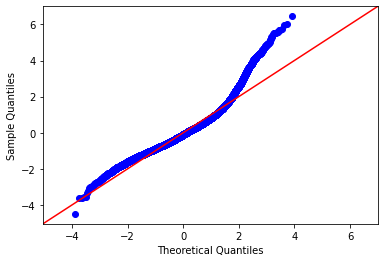

In [55]:
# QQ normality check here
import scipy.stats as stats

residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

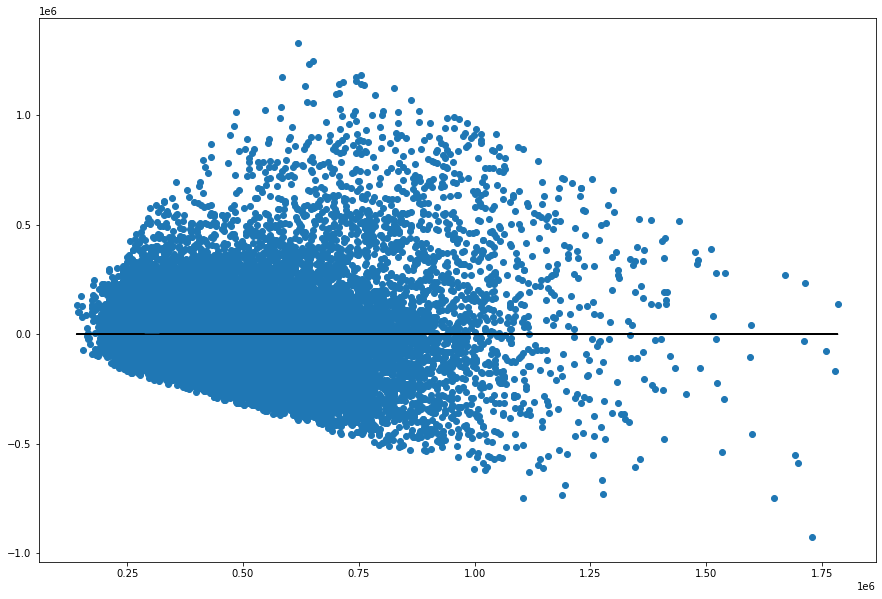

In [56]:
# Homoskedasticity 
plt.figure(figsize = (15, 10))
x_cols = ['sqft_living', 'waterfront__YES']
plt.scatter(model2.predict(df_99[x_cols]), model2.resid)
plt.plot(model2.predict(df_99[x_cols]), [0 for i in range(len(df_99))], c='black')

**Comments:** Although R score drop by 0.078, because extreme outliers are dropped, the QQ plot and the homoskedasticy figures shows smaller deviation from the assumptions on normality and homoskedasticity. Therefore, for the following model, we exlude the outliers.   

##### Model 3 
- This model added more housing features that related to the housing price but less so with sqft_living and other variables. 
- The R2 score increased to 0.584. Much like model 2, the linearity, normality, and homoskedasticity assumptions are not strongly violated. 


In [57]:
# Model 3 (price - sqft_living + bedrooms + waterfront + seattle + bedrooms + floors +vintage +C(grade_above_ave))  + C(cond_good)
formula3 = "price ~ sqft_living + C(waterfront__YES) + C(seattle) +C(grade_above_ave) +bedrooms + floors + vintage  + C(cond_good)"
model3 = smf.ols(formula3, df_99).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     3755.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:09:46   Log-Likelihood:            -2.8946e+05
No. Observations:               21379   AIC:                         5.789e+05
Df Residuals:                   21370   BIC:                         5.790e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -7.096e+04   7231.701     -9.813      0.000   -8.51e+04   -5.68e+04
C(waterfront__YES)[T.1]  4.416e+05   1.84e+04     24.001      0.000    4.06e+05    4.78e+05
C(seattle)[T.1]          1.055e+05   3170.859     33.265      0.000    9.93e+04    1.12e+05
C(grade_above_ave)[T.1]   1.26e+05   3339.903     37.737      0.000    1.19e+05    1.33e+05
C(cond_good)[T.1]        3.007e+04   2927.418     10.273      0.000    2.43e+04    3.58e+04
sqft_living               230.8185      2.193    105.231      0.000     226.519     235.118
bedrooms                -3.167e+04   1762.872    -17.963      0.000   -3.51e+04   -2.82e+04
floors                   2.621e+04   3006.563      8.719      0.000    2.03e+04    3.21e+04
vintage                  1786.7011     60.598     29.484      0.000    1667.924    1905.478
==============================================================================
Omnibus:                     5157.836   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21225.612
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.315   Cond. No.                     3.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

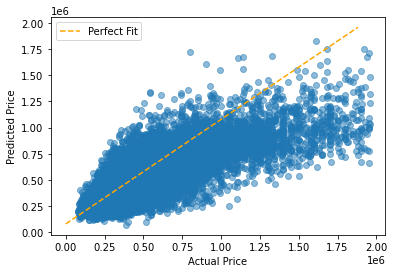

In [58]:
# Linearility check 
x_cols = ['sqft_living', 'waterfront__YES', 'bedrooms', 'seattle',
         'grade_above_ave', 'floors', 'vintage', 'cond_good']
preds = model3.predict(df_99[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df_99.price.min(), df_99.price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df_99.price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-59-d032dd8917d0>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


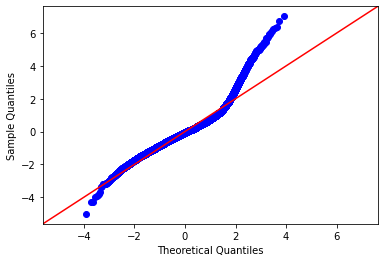

In [59]:
# QQ normality check here
import scipy.stats as stats

residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

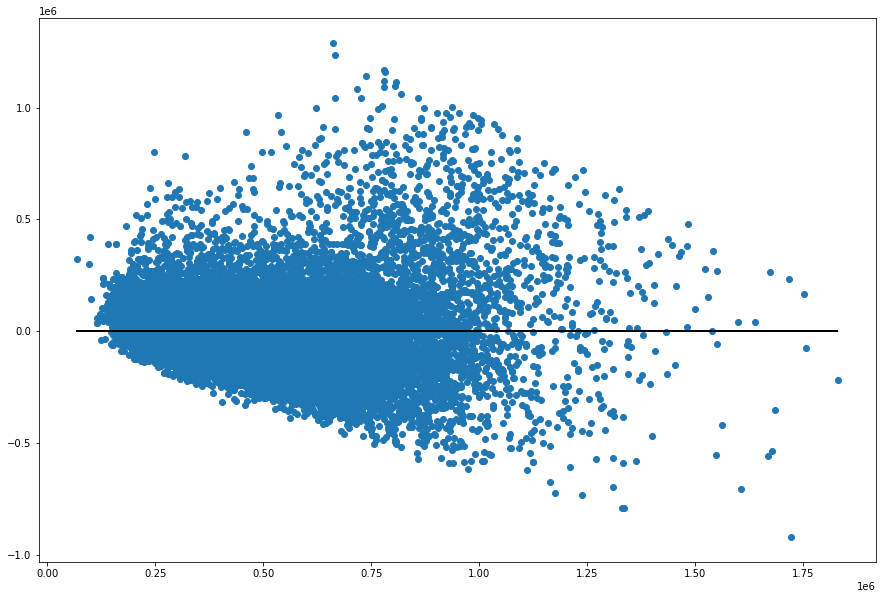

In [60]:
# Homoskedasticity 
plt.figure(figsize = (15, 10))
x_cols = ['sqft_living', 'waterfront__YES', 'bedrooms', 'seattle',
         'grade_above_ave', 'floors', 'vintage', 'cond_good']

plt.scatter(model3.predict(df_99[x_cols]), model3.resid)
plt.plot(model3.predict(df_99[x_cols]), [0 for i in range(len(df_99))], c='black')


##### Model 4 
- This model includes the interaction terms sqft_living and Seattle dummy. In general, a house in the city has smaller squared footage but a higher housing price, so this interaction term will catch these differences. 
- R2 does not show much improvement.


In [61]:
# Model 4 (price - sqft_living + sqft_living*seattle + waterfront) 
formula4 = "price ~ sqft_living + sqft_living*seattle  + C(waterfront__YES) + C(seattle) + C(grade_above_ave)  + bedrooms+ vintage + floors + C(cond_good) "
model4 = smf.ols(formula4, df_99).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     3346.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:09:48   Log-Likelihood:            -2.8944e+05
No. Observations:               21379   AIC:                         5.789e+05
Df Residuals:                   21369   BIC:                         5.790e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5.483e+04   7740.016     -7.084      0.000      -7e+04   -3.97e+04
C(waterfront__YES)[T.1]  4.397e+05   1.84e+04     23.908      0.000    4.04e+05    4.76e+05
C(seattle)[T.1]          3.348e+04   3671.479      9.118      0.000    2.63e+04    4.07e+04
C(grade_above_ave)[T.1]  1.257e+05   3337.878     37.655      0.000    1.19e+05    1.32e+05
C(cond_good)[T.1]        2.883e+04   2933.005      9.828      0.000    2.31e+04    3.46e+04
sqft_living               226.6791      2.304     98.367      0.000     222.162     231.196
seattle                  3.348e+04   3671.479      9.118      0.000    2.63e+04    4.07e+04
sqft_living:seattle        20.8303      3.582      5.816      0.000      13.810      27.850
bedrooms                -3.336e+04   1785.320    -18.683      0.000   -3.69e+04   -2.99e+04
vintage                  1767.3810     60.643     29.144      0.000    1648.516    1886.245
floors                   2.628e+04   3004.279      8.748      0.000    2.04e+04    3.22e+04
==============================================================================
Omnibus:                     5167.328   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21416.226
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.340   Cond. No.                     6.24e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<ipython-input-62-6f65925aae82>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


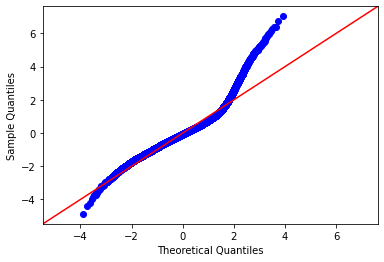

In [62]:
# QQ normality check here
import scipy.stats as stats

residuals = model4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

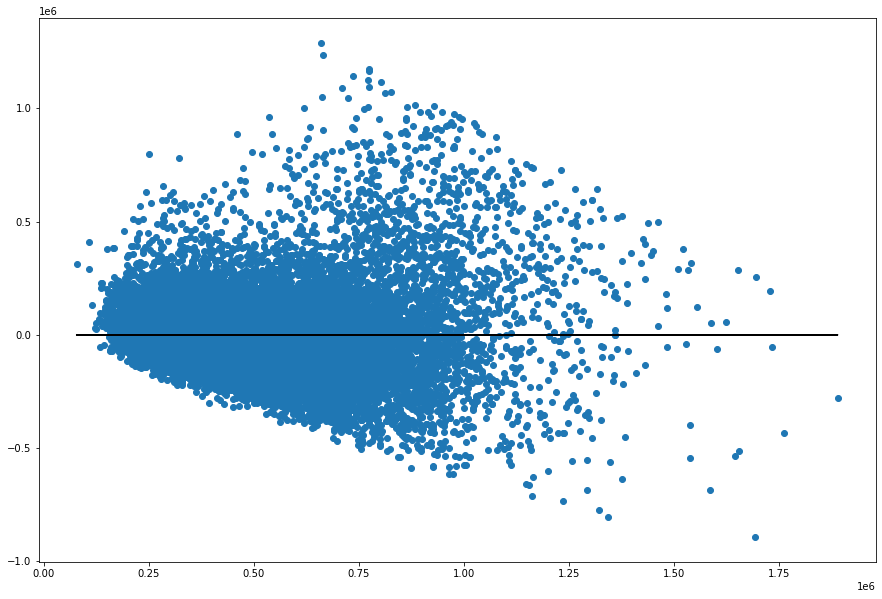

In [63]:
# Homoskedasticity 
plt.figure(figsize = (15, 10))
x_cols = ['sqft_living', 'waterfront__YES', 'bedrooms', 'seattle',
         'grade_above_ave', 'floors', 'vintage', 'cond_good']

plt.scatter(model4.predict(df_99[x_cols]), model4.resid)
plt.plot(model4.predict(df_99[x_cols]), [0 for i in range(len(df_99))], c='black')


##### Model 5

- This model uses the index of housing grade scores instead of a dummy variable with an above-average grade. A grade of 0 represents a poor-grade house, and 13 is the highest grade. 
- R2 sore improved to 0.642. However, the grade has strong correlation with sqft_living. 



In [97]:
# Model 5 (price - sqft_living + seattle + waterfront +bedrooms + grade + vintage +c(goodcondition))
formula5 = "price ~ sqft_living + C(seattle) + C(waterfront__YES) + bedrooms + grade + vintage + floors + C(cond_good)"
model5 = smf.ols(formula5, df_99).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     4812.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:24:03   Log-Likelihood:            -2.8783e+05
No. Observations:               21379   AIC:                         5.757e+05
Df Residuals:                   21370   BIC:                         5.758e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -8.348e+05   1.24e+04    -67.418      0.000   -8.59e+05   -8.11e+05
C(seattle)[T.1]          9.384e+04   2944.795     31.867      0.000    8.81e+04    9.96e+04
C(waterfront__YES)[T.1]  4.323e+05   1.71e+04     25.351      0.000    3.99e+05    4.66e+05
C(cond_good)[T.1]        3.235e+04   2712.552     11.925      0.000     2.7e+04    3.77e+04
sqft_living               150.8019      2.440     61.813      0.000     146.020     155.584
bedrooms                 -1.89e+04   1647.717    -11.470      0.000   -2.21e+04   -1.57e+04
grade                    1.228e+05   1707.612     71.934      0.000    1.19e+05    1.26e+05
vintage                  2324.2282     56.775     40.937      0.000    2212.944    2435.512
floors                   1.774e+04   2763.064      6.419      0.000    1.23e+04    2.32e+04
==============================================================================
Omnibus:                     5339.887   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23343.671
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       7.560   Cond. No.                     3.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-98-6fe0fb87884e>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


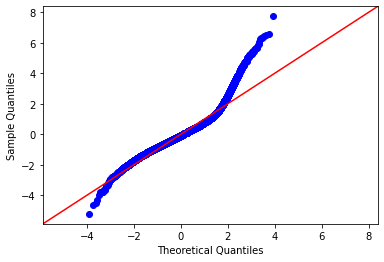

In [98]:
# QQ normality check here
import scipy.stats as stats

residuals = model5.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

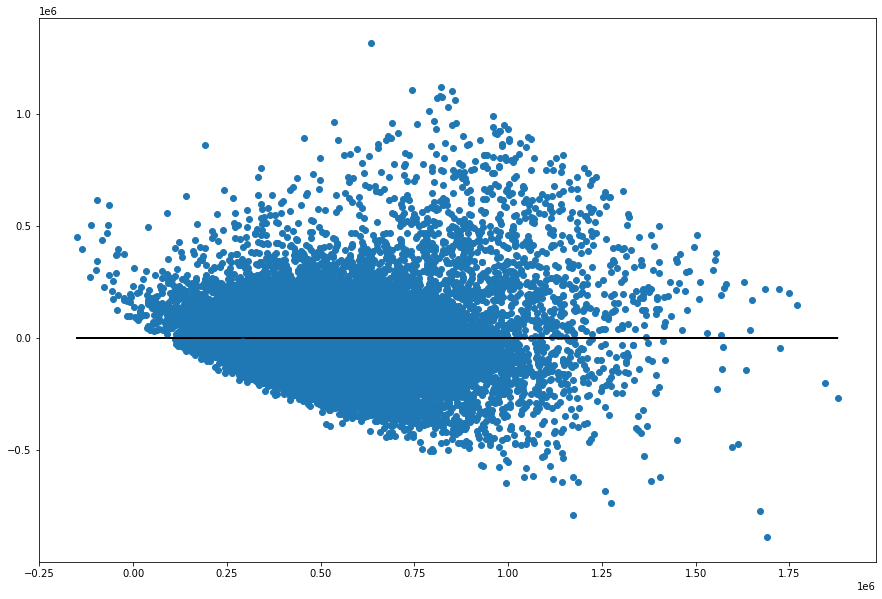

In [66]:
# Homoskedasticity 
plt.figure(figsize = (15, 10))
x_cols = ['sqft_living', 'waterfront__YES', 'bedrooms', 'seattle',
         'grade', 'floors', 'vintage', 'cond_good']

plt.scatter(model5.predict(df_99[x_cols]), model5.resid)
plt.plot(model5.predict(df_99[x_cols]), [0 for i in range(len(df_99))], c='black')


#### Regression excluding outliers (99%points threshold for price, sqft_living) 

<ipython-input-67-6b5566dc3042>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x = df_99[(df.seattle==1)].sqft_living,
<ipython-input-67-6b5566dc3042>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = df_99[(df.seattle==1)].price,
<ipython-input-67-6b5566dc3042>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x = df_99[(df.seattle==0)].sqft_living,
<ipython-input-67-6b5566dc3042>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = df_99[(df.seattle==0)].price,


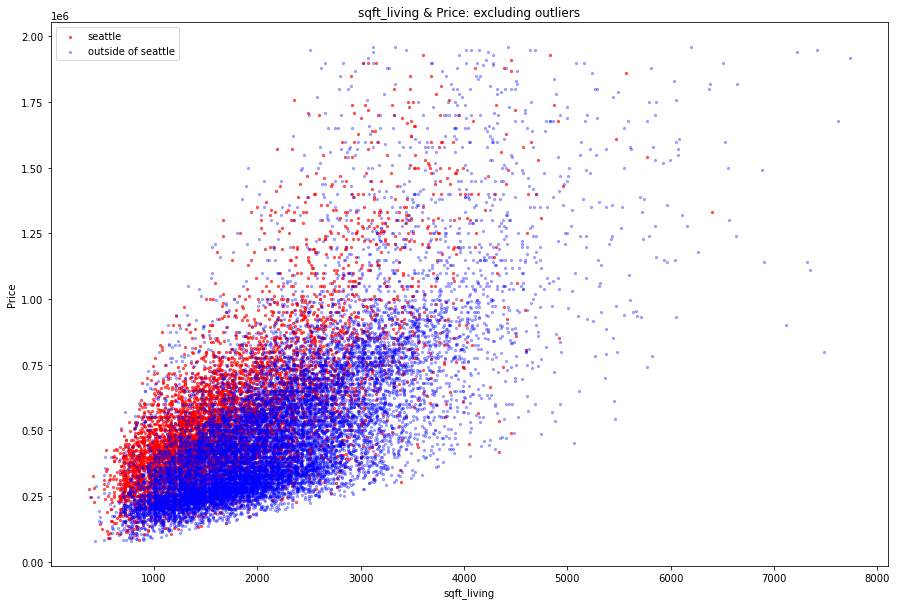

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(x = df_99[(df.seattle==1)].sqft_living, 
            y = df_99[(df.seattle==1)].price,
            c='r', s=5,
            alpha=0.6)
plt.scatter(x = df_99[(df.seattle==0)].sqft_living, 
            y = df_99[(df.seattle==0)].price,
            c='b', s=5,
            alpha=0.3)


plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("sqft_living & Price: excluding outliers")
plt.legend(["seattle", "outside of seattle"])

# make predictions for x values using Model 3. 
x = np.linspace(0, 5000)
#preds_seattle = model3.predict(df_99[(df.seattle==1)])
#preds_nonseattle = model3.predict(df_99[(df.seattle==0)])



plt.plot(x, model3.predict(x.reshape(-1, 1)), label='Seattle', color='r')

plt.plot(x, model3.predict(x.reshape(-1, 1)), label='Outside of Seattle', color='b')


# plot the least squares line

#plt.plot( preds_seattle, color='r')

#plt.plot(preds_nonseattle, color='b')

plt.tight_layout();


##### Model 6 (Log_price on Log_sqft_living and waterfront)  
- This model uses the log-transformed housing price and log-transformed sqft_living. The dependent variables are the same as the initial model of sqft_living and waterfront dummy. The R2 score is 0.469. 
- The linearity, normality, and homoskedasticity assumptions are strongly held.

In [67]:
# Log transformation 
df['sqft_living_log']=np.log(df.sqft_living)

ERROR! Session/line number was not unique in

 database. History logging moved to new session 400


<AxesSubplot:>

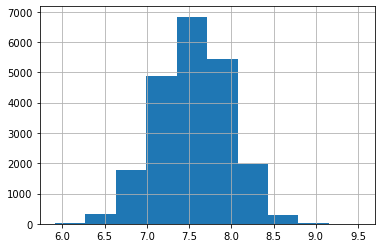

In [68]:
df.sqft_living_log.hist()

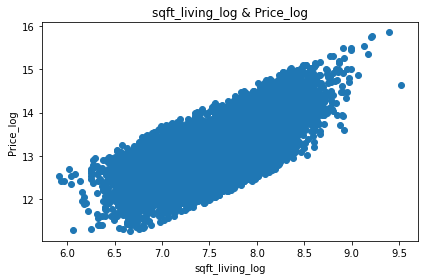

In [69]:
plt.scatter(x = df.sqft_living_log, 
            y = df.price_log)
plt.xlabel("sqft_living_log")
plt.ylabel("Price_log")
plt.title("sqft_living_log & Price_log")
plt.tight_layout()

In [70]:
# OLS (price_log - sqft_living_log) (original Adj.R2: 0.493)
# (df99 Adj.R2:0.435)

formula6 = "price_log ~ sqft_living_log + C(waterfront__YES) "
model6 = smf.ols(formula6, df).fit()
model6.summary()
#plt.savefig('ols_price_sqft_living')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     9546.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:09:50   Log-Likelihood:                -9951.0
No. Observations:               21596   AIC:                         1.991e+04
Df Residuals:                   21593   BIC:                         1.993e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.8055      0.047    145.825      0.000       6.714       6.897
C(waterfront__YES)[T.1]     0.7596      0.032     23.771      0.000       0.697       0.822
sqft_living_log             0.8261      0.006    133.816      0.000       0.814       0.838
==============================================================================
Omnibus:                      120.378   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.030
Skew:                           0.099   Prob(JB):                     3.13e-22
Kurtosis:                       2.733   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

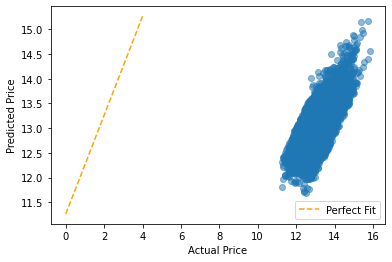

In [71]:
# Linearility check 
x_cols = ['sqft_living_log', 'waterfront__YES']
preds = model6.predict(df[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df.price_log.min(), df.price_log.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.price_log, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-72-991acedb96be>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


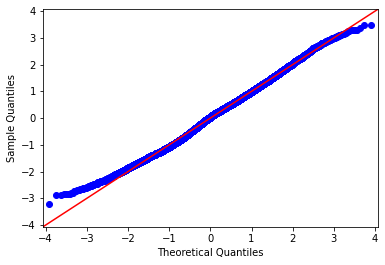

In [72]:
# QQ normality check here
import scipy.stats as stats

residuals = model6.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

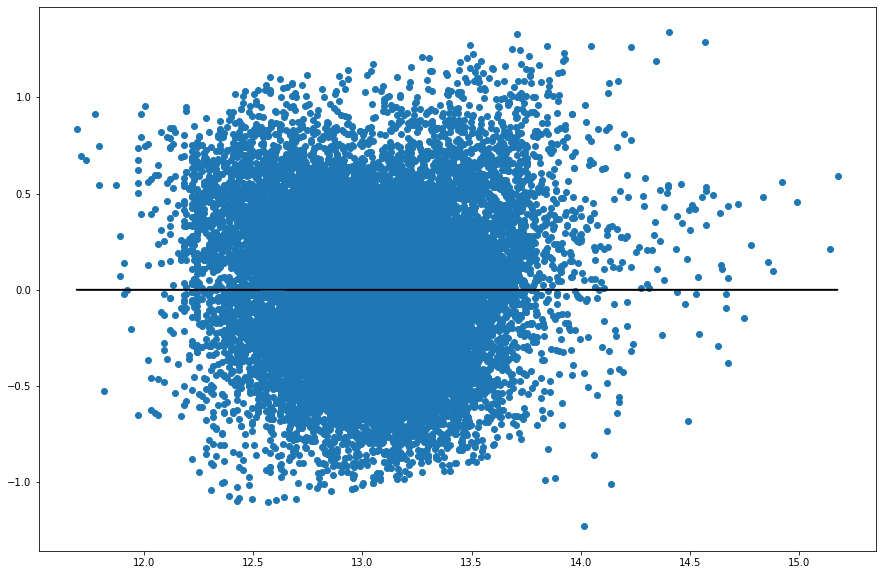

In [73]:
# Homoskedasticity 
plt.figure(figsize = (15, 10))
x_cols = ['sqft_living_log', 'waterfront__YES']

plt.scatter(model6.predict(df[x_cols]), model6.resid)
plt.plot(model6.predict(df[x_cols]), [0 for i in range(len(df))], c='black')


##### Model 7
- The model adds other housing features to model 6. The R2 score is 0.602. 
- The coefficient shows that a 1% increase in sqft_living is associated with a (0.83% or 83% ?) increase in the housing price.

In [74]:
# Model 7 OLS (price_log - sqft_living) (original Adj.R2: 0.493)
# (df99 Adj.R2:0.435)


formula7 = "price_log ~ sqft_living_log + C(waterfront__YES) + C(seattle) +C(grade_above_ave) +bedrooms + floors + vintage"
model7 = smf.ols(formula7, df).fit()
model7.summary()
#plt.savefig('ols_price_sqft_living')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     4672.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:09:51   Log-Likelihood:                -6833.7
No. Observations:               21596   AIC:                         1.368e+04
Df Residuals:                   21588   BIC:                         1.375e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.5124      0.058    112.901      0.000       6.399       6.626
C(waterfront__YES)[T.1]     0.6768      0.028     24.341      0.000       0.622       0.731
C(seattle)[T.1]             0.2442      0.006     43.033      0.000       0.233       0.255
C(grade_above_ave)[T.1]     0.2696      0.006     44.199      0.000       0.258       0.282
sqft_living_log             0.8351      0.009     97.289      0.000       0.818       0.852
bedrooms                   -0.0529      0.003    -16.009      0.000      -0.059      -0.046
floors                      0.0392      0.005      7.316      0.000       0.029       0.050
vintage                     0.0032      0.000     30.811      0.000       0.003       0.003
==============================================================================
Omnibus:                      149.685   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.598
Skew:                           0.119   Prob(JB):                     4.09e-42
Kurtosis:                       3.394   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

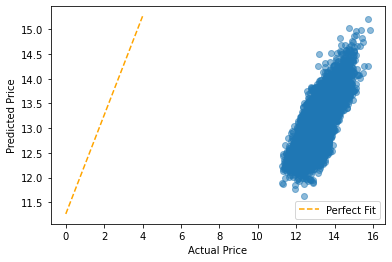

In [75]:
# Linearility check 
x_cols = ['sqft_living_log', 'waterfront__YES', 'seattle', 'grade_above_ave', 'bedrooms', 'floors', 'vintage']

preds = model7.predict(df[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df.price_log.min(), df.price_log.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.price_log, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-76-a81195ab4c86>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


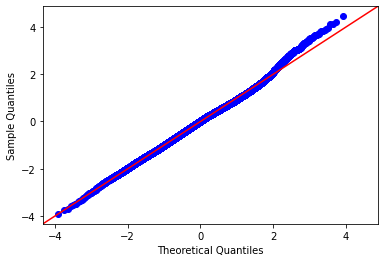

In [76]:
# QQ normality check here
import scipy.stats as stats

residuals = model7.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

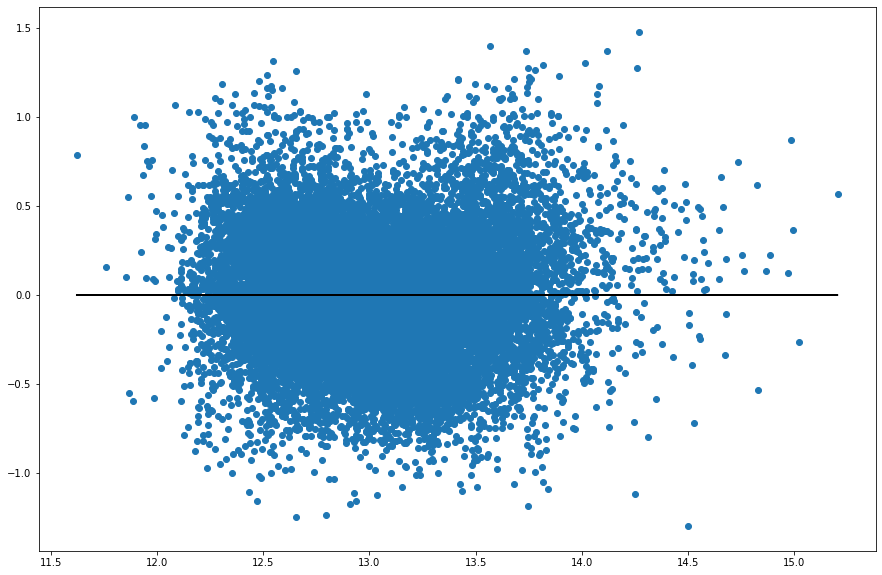

In [77]:
# Homoskedasticity 
plt.figure(figsize = (15, 10))
x_cols = ['sqft_living_log', 'waterfront__YES', 'seattle', 'grade_above_ave', 'bedrooms', 'floors', 'vintage']

plt.scatter(model7.predict(df[x_cols]), model7.resid)
plt.plot(model7.predict(df[x_cols]), [0 for i in range(len(df))], c='black')


##### Model 8
- This model uses the housing grade index instead of a dummy with an above-average grade. 
- The R2 score increased to 0.663

In [78]:
# Model 8 (price - sqft_living + sqft_living + waterfront +grade +..) 

formula8 = "price_log ~ sqft_living_log + C(waterfront__YES) + C(seattle) +grade +bedrooms + floors + vintage"
model8 = smf.ols(formula8, df).fit()
model8.summary()
#plt.savefig('ols_price_sqft_living')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     6065.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:09:52   Log-Likelihood:                -5050.1
No. Observations:               21596   AIC:                         1.012e+04
Df Residuals:                   21588   BIC:                         1.018e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.0107      0.052    135.642      0.000       6.909       7.112
C(waterfront__YES)[T.1]     0.5947      0.026     23.208      0.000       0.544       0.645
C(seattle)[T.1]             0.2218      0.005     42.370      0.000       0.212       0.232
sqft_living_log             0.5428      0.009     59.056      0.000       0.525       0.561
grade                       0.2282      0.003     78.625      0.000       0.222       0.234
bedrooms                   -0.0283      0.003     -9.232      0.000      -0.034      -0.022
floors                      0.0255      0.005      5.206      0.000       0.016       0.035
vintage                     0.0040   9.61e-05     41.692      0.000       0.004       0.004
==============================================================================
Omnibus:                      162.840   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.513
Skew:                           0.089   Prob(JB):                     8.81e-51
Kurtosis:                       3.474   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-79-9f3e7f54fe46>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


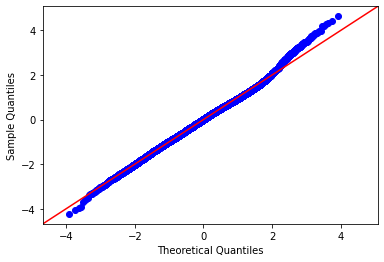

In [79]:
# QQ normality check here
import scipy.stats as stats

residuals = model8.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

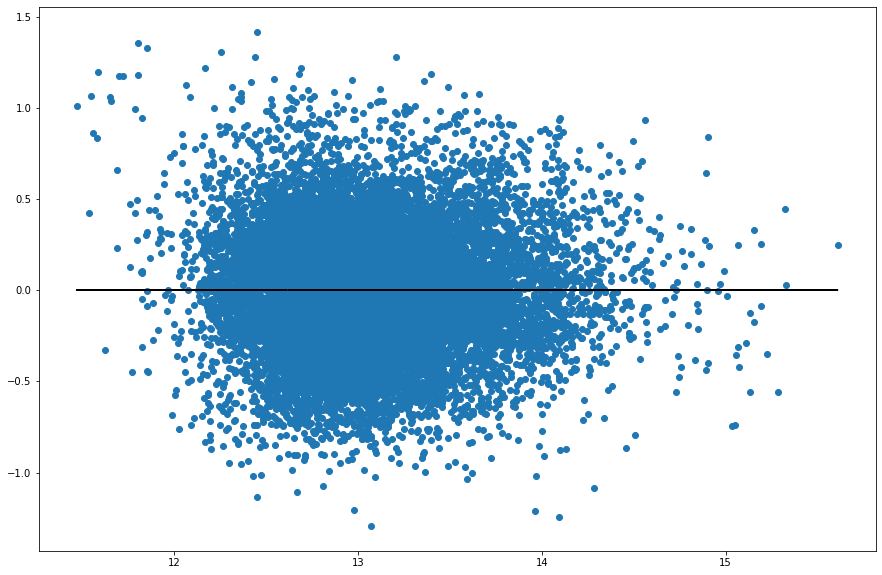

In [80]:
# Homoskedasticity 
plt.figure(figsize = (15, 10))
x_cols = ['sqft_living_log', 'waterfront__YES', 'seattle', 'grade', 'bedrooms', 'floors', 'vintage']

plt.scatter(model8.predict(df[x_cols]), model8.resid)
plt.plot(model8.predict(df[x_cols]), [0 for i in range(len(df))], c='black')


**Comments:** 
The model completely violate the normality assumption (the Q-Q plot). There are clear patterns in the residuals (probably due to outliers).
As price goes up, the variance of residuals goes up.  

Figure below shows that as values(sqft_living) increases, residual increases. => a clear sign of heteroskedasticity


### Pick Model 7/8 (Log transformed) or Model 5/3  ? 

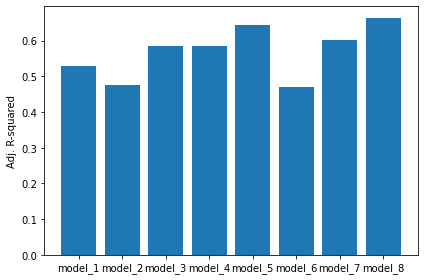

In [81]:
# comparison model's Adj. R2. 

fig = plt.figure()

adjr2=[
model1.rsquared_adj, 
model2.rsquared_adj,
model3.rsquared_adj,
model4.rsquared_adj,
model5.rsquared_adj,
model6.rsquared_adj,
model7.rsquared_adj,
model8.rsquared_adj
]

model_names = ['model_1', 'model_2', 'model_3', 'model_4', 
                'model_5', 'model_6', 'model_7', 'model_8']

plt.bar(x=model_names, height=adjr2)
plt.ylabel('Adj. R-squared')

plt.tight_layout();

3.3934462570174215

In [83]:
result8 = pd.DataFrame(model8.params)
result8.iloc[1:][0]
#result[0]

C(waterfront__YES)[T.1]    0.594680
C(seattle)[T.1]            0.221846
sqft_living_log            0.542804
grade                      0.228167
bedrooms                  -0.028288
floors                     0.025480
vintage                    0.004005
Name: 0, dtype: float64

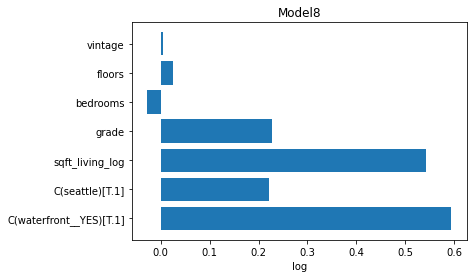

In [84]:
y = result8.index[1: ]
width = result8.iloc[1:][0]
plt.barh(y=y, width=width)
plt.xlabel("log")
plt.title('Model8');

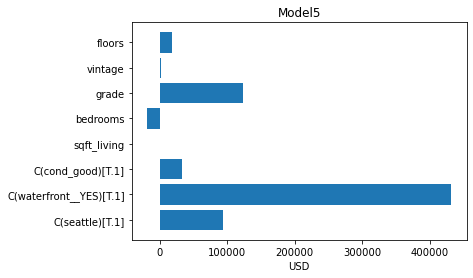

In [85]:
result5 = pd.DataFrame(model5.params)
result5.iloc[1:][0]

y = result5.index[1: ]
width = result5.iloc[1:][0]
plt.barh(y=y, width=width)
plt.xlabel('USD')
plt.title('Model5');

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyRegressor

from sklearn.feature_selection import RFE



#### 4. Building Price Prediction Model

##### 4.1 Baseline Model

In [87]:
dfp = df.drop(labels=(['yr_built', 'yr_sold', 'grade_above_ave', 'sqft_living_log']), axis=1)
dfp.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,price_log,vintage,cond_good,cond_ave,waterfront__YES,seattle
0,221900.0,3,1.00,1180,5650,1.0,7,12.309982,59,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,7,13.195614,63,0,1,0,1
2,180000.0,2,1.00,770,10000,1.0,6,12.100712,82,0,1,0,0
3,604000.0,4,3.00,1960,5000,1.0,7,13.311329,49,1,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,8,13.142166,28,0,1,0,0


In [88]:
y = dfp.price
X = dfp.drop(labels=['price_log', 'price'], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17276 4320 17276 4320


In [89]:
dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
  
dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)

y_hat_train_mean = dummy_mean.predict(X_train)
y_hat_test_mean = dummy_mean.predict(X_test)

y_hat_train_median = dummy_median.predict(X_train)
y_hat_test_median = dummy_median.predict(X_test)

In [90]:
# R2 score - baseline model (mean) 
print(f"R2 score for baseline model (mean) with train data: {dummy_mean.score(X_train, y_train)}")
print(f"R2 score for baseline model (mean) with test data: {dummy_mean.score(X_test, y_test)}")




R2 score for baseline model (mean) with train data: 0.0
R2 score for baseline model (mean) with test data: -0.00015839521795513178


In [91]:
# MSE - baseline model (mean) 
train_mse_mean = mean_squared_error(y_train, y_hat_train_mean)
test_mse_mean = mean_squared_error(y_test, y_hat_test_mean)
print('Train Mean Squarred Error (mean model):', train_mse_mean)
print('Test Mean Squarred Error (mean model):', test_mse_mean)

Train Mean Squarred Error (mean model): 135941436748.43039
Test Mean Squarred Error (mean model): 131033764077.49681


In [92]:
# R2 score - baseline model (median)
print(f"R2 score for baseline model (median) with train data: {dummy_median.score(X_train, y_train)}")
print(f"R2 score for baseline model (median) with test data: {dummy_median.score(X_test, y_test)}")


R2 score for baseline model (median) with train data: -0.06118829957449967
R2 score for baseline model (median) with test data: -0.057306061068561176


In [93]:
# MSE - baseline model (median) 
train_mse_median = mean_squared_error(y_train, y_hat_train_median)
test_mse_median = mean_squared_error(y_test, y_hat_test_median)
print('Train Mean Squarred Error (median model):', train_mse_median)
print('Test Mean Squarred Error (median model):', test_mse_median)

Train Mean Squarred Error (median model): 144259462104.78125
Test Mean Squarred Error (median model): 138520851923.23355


In [94]:
my_sample = dfp.sample(1)
my_sample_price = my_sample.iloc[0, 0]
my_sample_pt = my_sample.drop('price', axis=1)

# Show my random sample off
print(f'Price of sample: ${my_sample_price}')
my_sample_pt

Price of sample: $675000.0


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,price_log,vintage,cond_good,cond_ave,waterfront__YES,seattle
4432,4,3.5,3090,100835,2.0,9,13.422468,16,0,1,0,0


In [95]:
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    '''
    Takes in features & targets from `data` to train a linear regression with a
    random sample `ntimes`. It then returns a list of R2 scores, RMSEs, and the 
    predictions from a provided data point of features `sample_pt`.
    '''
    # To save all of our predictions
    r2 = []
    rmse = []
    # Only return predictions if there is something to predict (sample_pt given)
    point_preds = [] if (sample_pt is not None) else None

    # We'll repeat this little experiment to see how the model does
    for i in range(ntimes):
        # Creating a random sample of data to train on
        df_sample = data.sample(5000, replace=True)
        y = df_sample.price
        X = df_sample.drop('price', axis=1)

        # Our linear regression model about to be trained
        lr = LinearRegression()
        lr.fit(X, y)

        # Making predictions & evaluating on the data we used to train the model
        y_hat = lr.predict(X)
        rmse.append(np.sqrt(mean_squared_error(y, y_hat)))
        r2.append(lr.score(X, y))

        # Making a prediction on the one point the model definitely never saw
        if sample_pt is not None:
            y_hat_pt = lr.predict(sample_pt)
            # Getting just the single point to add into list
            point_preds.append(y_hat_pt[0])
    
    return r2, rmse, point_preds

In [96]:
ax = sns.boxplot(x=pt_preds_simple);
ax = sns.swarmplot(x=pt_preds_simple, color='orange', ax=ax)
ax.set_title(f'Predicting Sample Pt Price: ${my_sample_price:,.2f} (Simple LR)');

NameError: name 'pt_preds_simple' is not defined

##### 4.1 Model 1 (Model with All Numeric Features)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

print(f"R2 score with train data: {lr.score(X_train, y_train)}")
print(f"R2 score with test data: {lr.score(X_test, y_test)}")


In [ ]:
train_mse_model1 = mean_squared_error(y_train, y_hat_train)
test_mse_model1 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse_model1)
print('Test Mean Squarred Error:', test_mse_model1)

In [ ]:
train_rmse_model1 = mean_squared_error(y_train, y_hat_train, squared=False)
test_rmse_model1 = mean_squared_error(y_test, y_hat_test, squared=False)
print('Train Root Mean Squarred Error:', train_rmse_model1)
print('Test Root Mean Squarred Error:', test_rmse_model1)

In [ ]:
"""
RMSE=213790 means that for an average housing, this algorithm will
be off by about $214000. Given that average housing price for 
this dataset is about $540000, error is very large. Our prediction 
needs expart adjustment. 
Depending only on this algorithm is not recommended. 
"""

##### 4.2 Model 2 (Model with selected features)

Using **Feature Ranking with Recursive Feature Elimination**, we select the pre-specified  5  most important features.

In [ ]:
# Scale the data to normalize the coefficients
X_train_for_RFE = StandardScaler().fit_transform(X_train)

model_for_RFE = LinearRegression()

# Instantiate and fit the selector
selector = RFE(model_for_RFECV)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

In [ ]:
# Use the selected columns 
selectedcolumns = X_train.columns[selector.support_]

model_for_RFE.fit(X_train[selectedcolumns],y_train)

y_hat_train_RFE = model_for_RFE.predict(X_train[selectedcolumns])
y_hat_test_RFE = model_for_RFE.predict(X_test[selectedcolumns])

#print( model_for_RFE.coef_ ) 
#print( model_for_RFE.intercept_ ) 
print(f"R2 score with train data: {model_for_RFE.score(X_train[selectedcolumns], y_train)}")
print(f"R2 score with test data: {model_for_RFE.score(X_test[selectedcolumns], y_test)}")


In [ ]:
train_mse_model2 = mean_squared_error(y_train, y_hat_train_RFE)
test_mse_model2 = mean_squared_error(y_test, y_hat_test_RFE)
print('Train Mean Squarred Error:', train_mse_model2)
print('Test Mean Squarred Error:', test_mse_model2)
# does not seem to be a big difference between the train and test MSE.  

In [ ]:
train_rmse_model2 = mean_squared_error(y_train, y_hat_train_RFE,  squared=False)
test_rmse_model2 = mean_squared_error(y_test, y_hat_test_RFE,  squared=False)
print('Train Root Mean Squarred Error:', train_rmse_model2)
print('Test Root Mean Squarred Error:', test_rmse_model2)

In [ ]:
"""
RMSE=216216 means that for an average housing, this algorithm will
be off by about $216000. Given that average housing price for 
this dataset is about $540000, we would definitely want to have an expart check
and adjust these predicted prices rather than just allowing the algorithm
to set them. 
"""

In [ ]:
df.price.mean()

##### 4.3 Model 3 (Polynominal Model with all features)